# Glacier Meltwater Runoff model
This notebook walks through modelling how meltwater will flow over a glacier and how it will change with different meltwater production.

In [16]:
from landlab.components import FlowDirectorD8, FlowAccumulator, SinkFiller, ChannelProfiler
from landlab import RasterModelGrid
from landlab.plot.drainage_plot import drainage_plot
from landlab.plot.graph import plot_graph
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
from GlacierSurfaceFlow import GlacierSurfaceFlow
from plotting import flowdir_plot

## Create Class for DEM and FlowAccumulator

## Plotting the Topography of Some Cases

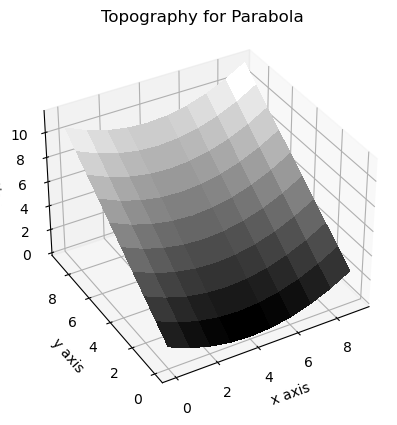

In [17]:
mg = GlacierSurfaceFlow('Parabola')
mg.surf_plot()

In [20]:
mg.create_flow_acc()

In [38]:
test_topo = mg.grid.at_node['topographic__elevation'].copy()
test_da = mg.grid.at_node['surface_water__discharge'].copy()
test_masked = np.ma.masked_where(test_da < 5,test_topo)
mg.grid.add_field('masked_topography',test_masked,clobber=True)

array([  1.6,   0.9,   0.4,   0.1,   0. ,   0.1,   0.4,   0.9,   1.6,
         2.5,   2.6,   1.9,   1.4,   1.1,   1. ,   1.1,   1.4,   1.9,
         2.6,   3.5,   3.6,   2.9,   2.4,   2.1,   2. ,   2.1,   2.4,
         2.9,   3.6,   4.5,   4.6,   3.9,   3.4,   3.1,   3. ,   3.1,
         3.4,   3.9,   4.6,   5.5,   5.6,   4.9,   4.4,   4.1,   4. ,
         4.1,   4.4,   4.9,   5.6,   6.5,   6.6,   5.9,   5.4,   5.1,
         5. ,   5.1,   5.4,   5.9,   6.6,   7.5,   7.6,   6.9,   6.4,
         6.1,   6. ,   6.1,   6.4,   6.9,   7.6,   8.5,   8.6,   7.9,
         7.4,   7.1,   7. ,   7.1,   7.4,   7.9,   8.6,   9.5,   9.6,
         8.9,   8.4,   8.1,   8. ,   8.1,   8.4,   8.9,   9.6,  10.5,
        10.6,   9.9,   9.4,   9.1,   9. ,   9.1,   9.4,   9.9,  10.6,  11.5])

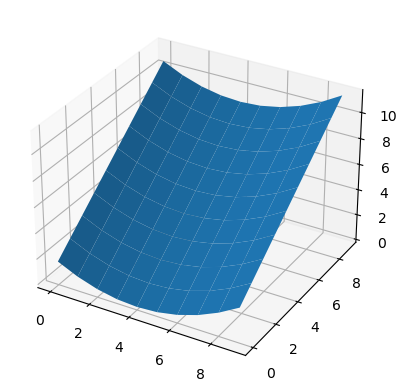

In [43]:
ny,nx = mg.grid.number_of_node_rows,mg.grid.number_of_node_columns
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(mg.grid.x_of_node.reshape(mg.grid.shape),
            mg.grid.y_of_node.reshape(mg.grid.shape),
                mg.grid.at_node['topographic__elevation'].reshape(mg.grid.shape))
ax.pl

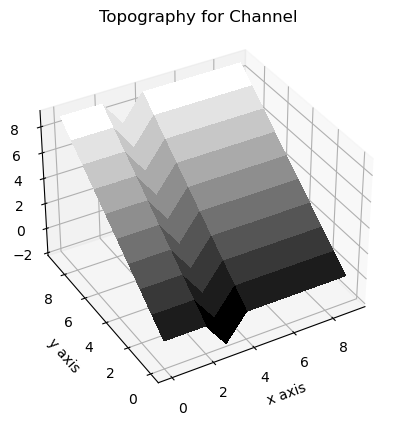

In [18]:
mg1 = GlacierSurfaceFlow('Channel')
mg1.surf_plot()

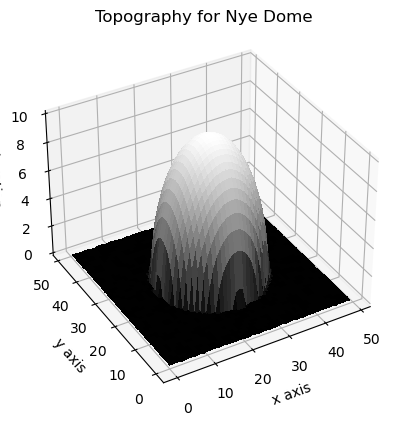

In [19]:
mg2 = GlacierSurfaceFlow('Nye Dome')
mg2.surf_plot()

## Create FlowAccumulator Tool
Testing how FlowAccumulator works

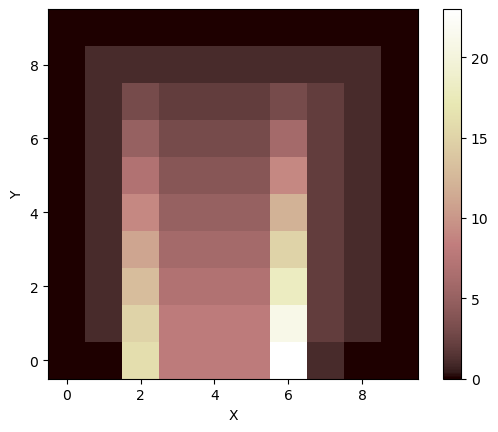

In [79]:
mg.create_flow_acc()
mg.da_plot()
# fd = FlowDirectorD8(mg,'topographic__elevation')
# fd.run_one_step()
# receivers = fd.direct_flow()
# plt.figure()
# drainage_plot(mg,title='parabola drainage plot')

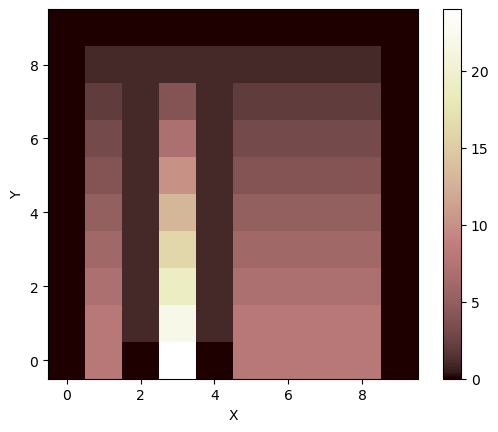

In [80]:
mg1.create_flow_acc()
mg1.da_plot()

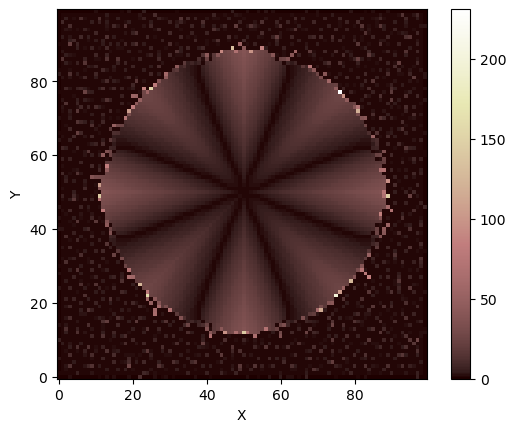

In [81]:
mg2.create_flow_acc()
mg2.da_plot()

## DEM and Drainage Area

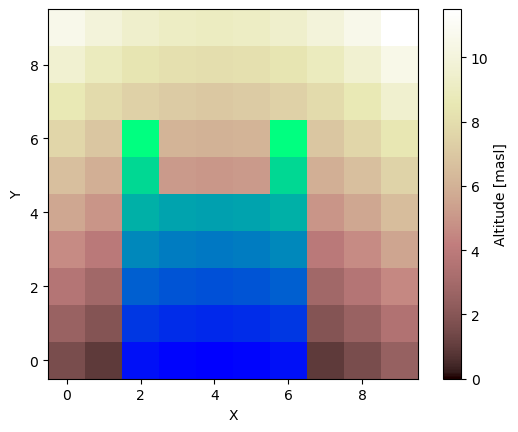

In [82]:
mg.dem_da_plot()

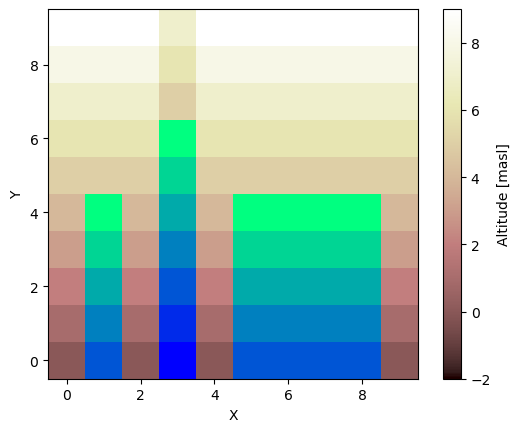

In [83]:
mg1.dem_da_plot()

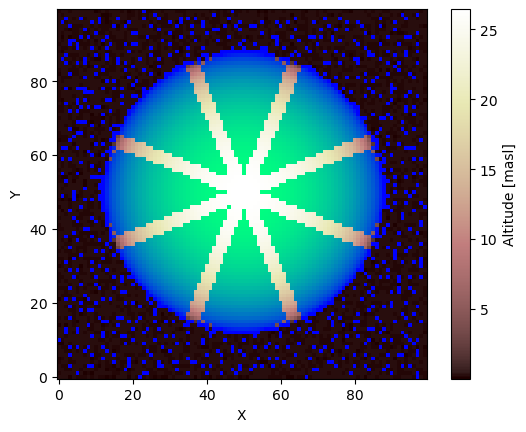

In [84]:
mg2.dem_da_plot()

## Source Input

## Sink Filler

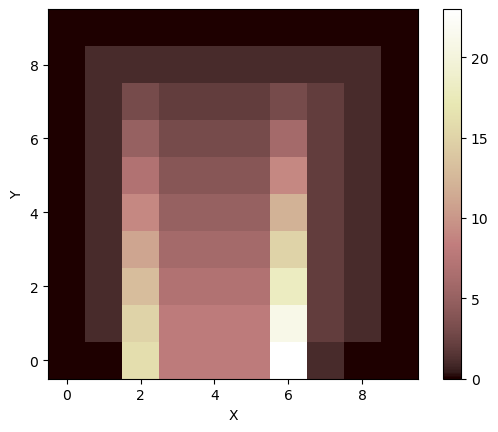

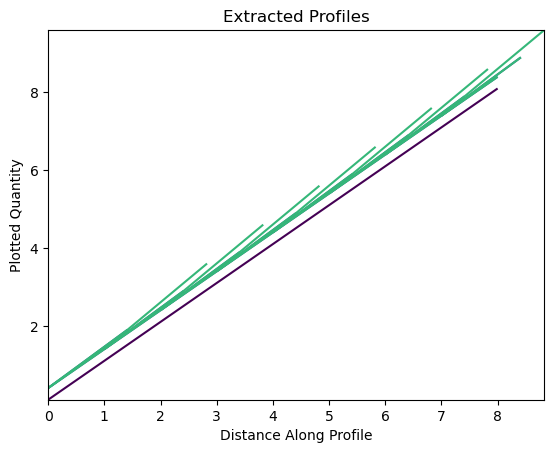

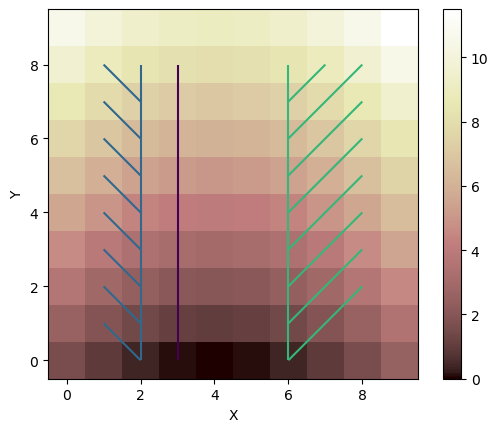

In [91]:
mg.sink_fillin(nw=3, mct=0)

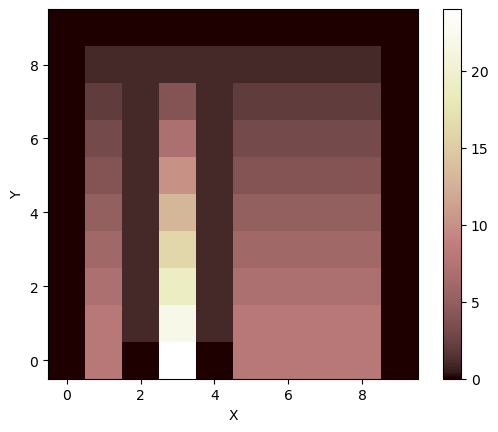

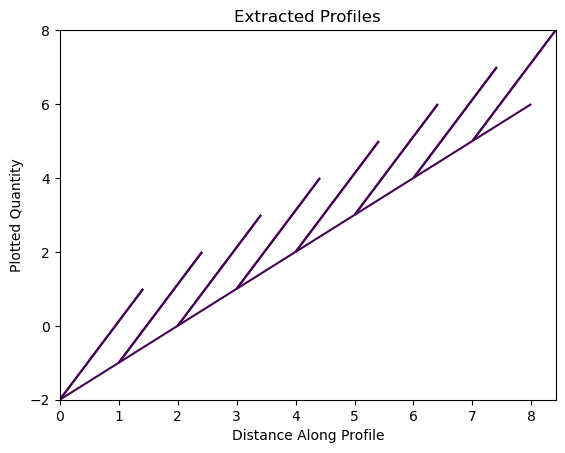

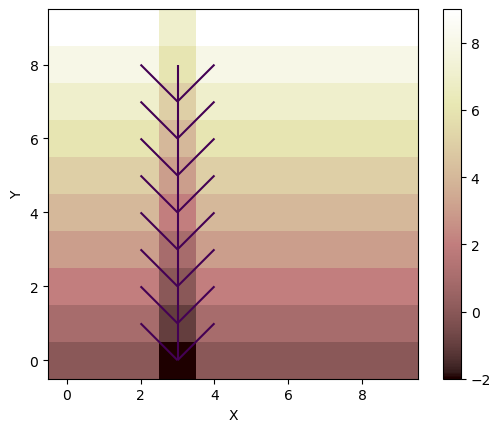

In [90]:
mg1.sink_fillin(nw=1, mct=0)

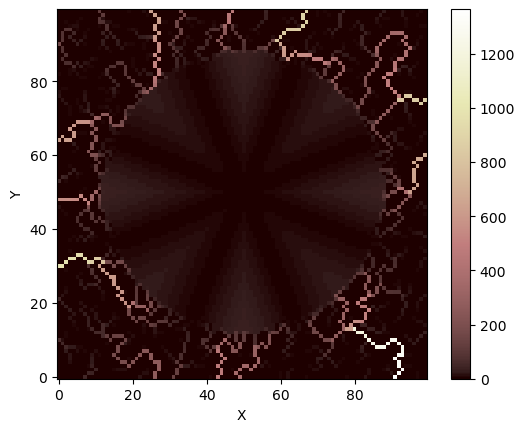

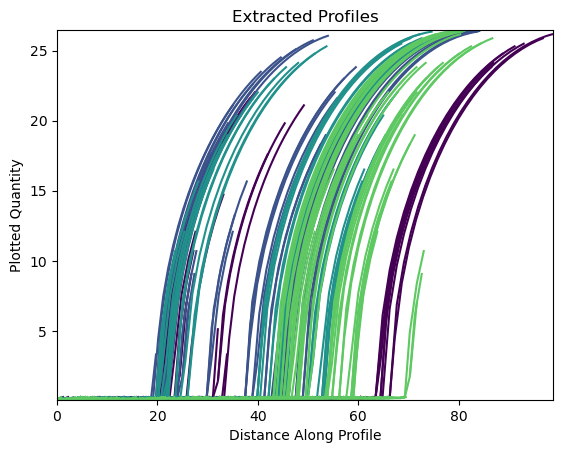

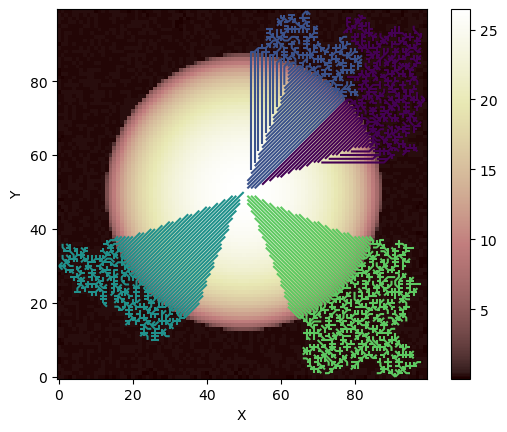

In [88]:
mg2.sink_fillin(nw=4, mct=0)

In [53]:
# plotting routine to make 3d plot of our surface
def surf_plot(mg,surface='topographic__elevation',title='Ice topography'):
    plt.figure()
    ax=plt.axes(projection='3d')
    
    # plot the surface
    z = mg.at_node[surface].reshape(mg.shape)
    #color = cm.gray((z - z.min()) / (z.max() - z.min()))
    ax.plot_surface(
        mg.x_of_node.reshape(mg.shape),
        mg.y_of_node.reshape(mg.shape),
        z,
        rstride=1,
        cstride=1,
        cmap=cm.cividis,
        linewidth=0.0,
        antialiased=False,
    )
    ax.view_init(elev=35,azim=-120)
    ax.set_xlabel('x axis')
    ax.set_ylabel('y axis')
    ax.set_zlabel('elevation')
    plt.title(title)
    plt.show()

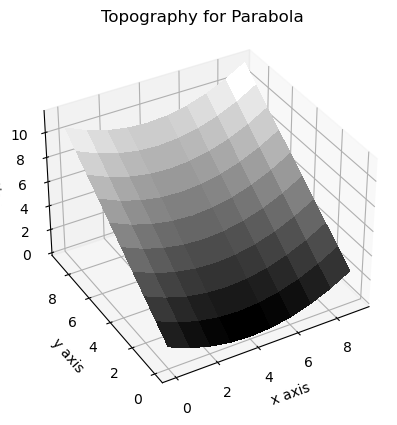

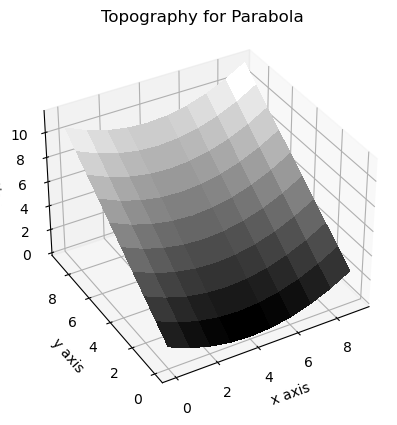

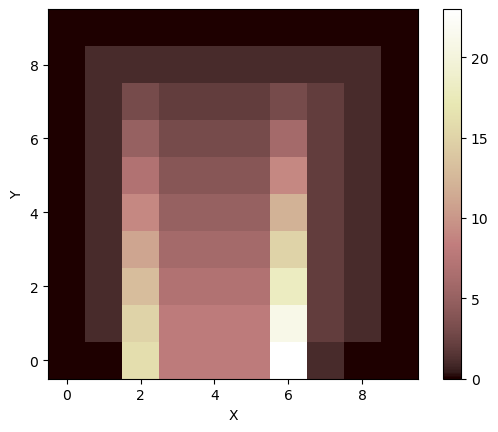

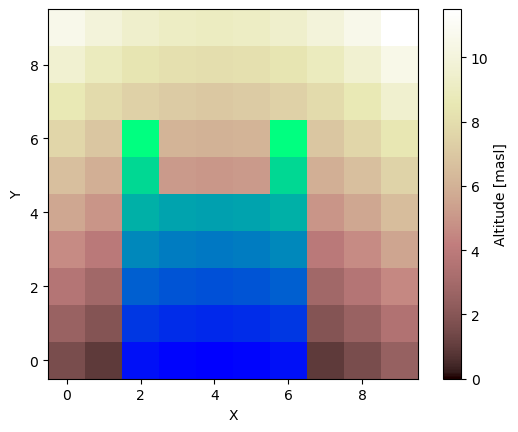

In [11]:
mg = GlacierSurfaceFlow('Parabola')
mg.surf_plot()
mg.create_flow_acc()
mg.surf_plot()
mg.da_plot()
mg.dem_da_plot(da_threshold1 = 5)

# z2 = 700 - 0.5*((mg.y_of_node-50)**2 + (mg.x_of_node-50)**2)
# z2[z2 <0]=0
# elev = mg.add_field('topographic__elevation',np.sqrt(z2),at='node')
# surf_plot(mg)

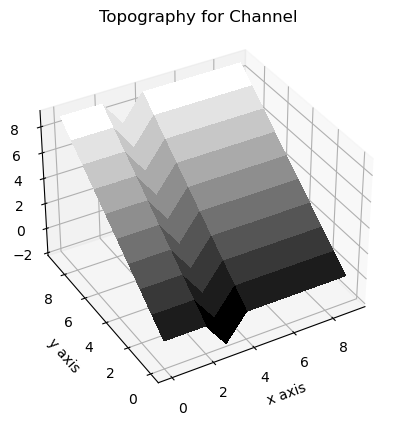

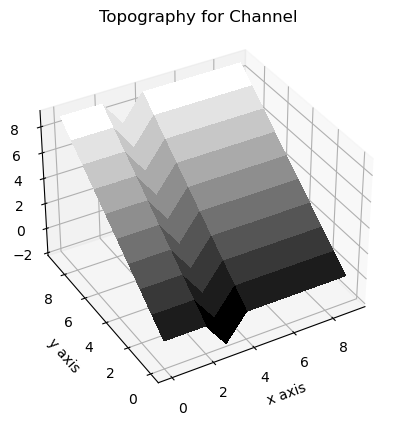

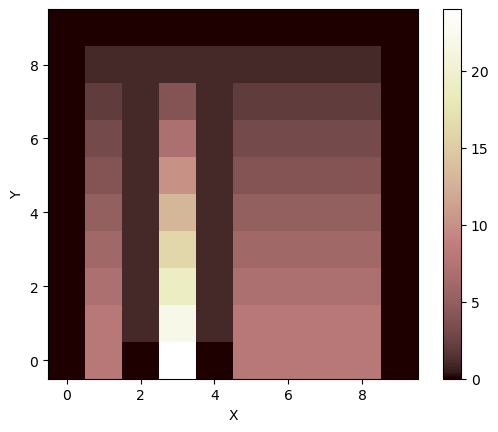

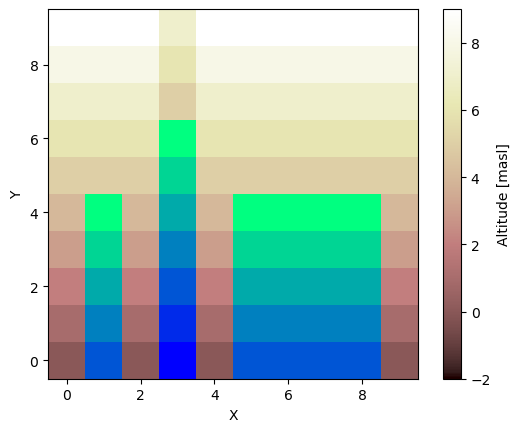

In [13]:
mg1 = GlacierSurfaceFlow('Channel')
mg1.surf_plot()
mg1.create_flow_acc()
mg1.surf_plot()
mg1.da_plot()
mg1.dem_da_plot(da_threshold1 = 5)
# mg1 = RasterModelGrid((10,10))
# elev = mg1.add_field("topographic__elevation", mg1.y_of_node+ 0.1 * (mg1.x_of_node-4)**2, at="node",clobber=True)
# surf_plot(mg1,title='parabolic ice topography')

In [31]:
mg1.create_flow_acc()
mg1.q
mg1.dem_da_plot('Altitude [masl]')

AttributeError: 'RasterModelGrid' object has no attribute 'create_flow_acc'

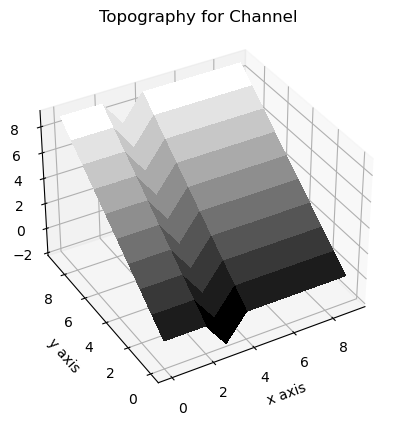

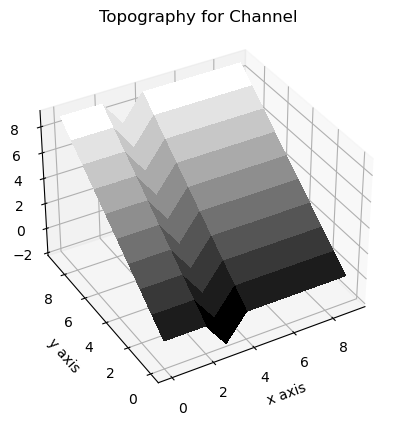

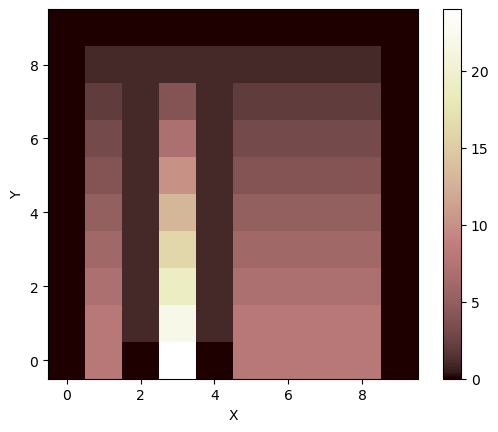

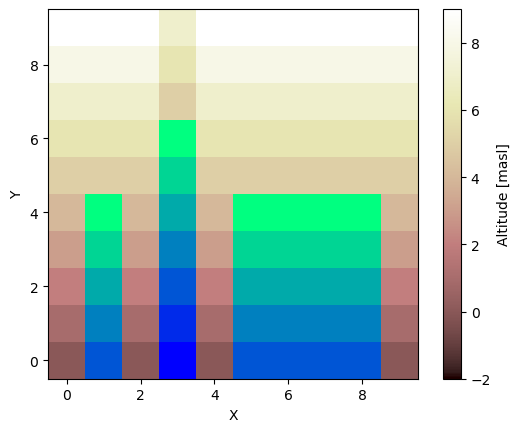

In [14]:
mg2 = GlacierSurfaceFlow('Channel')
mg2.surf_plot()
mg2.create_flow_acc()
mg2.surf_plot()
mg2.da_plot()
mg2.dem_da_plot(da_threshold1 = 5)

# mg2 = RasterModelGrid((10,10))
# elev2 = mg2.add_field("topographic__elevation", 1*mg2.y_of_node, at="node",clobber=True)
# elev2[(mg2.x_of_node > 2) & (mg1.x_of_node < 4)] -=2
# surf_plot(mg2,title='channel ice topography')

In [12]:
fd1 = FlowDirectorD8(mg1,'topographic__elevation')
fd2 = FlowDirectorD8(mg2,'topographic__elevation')

In [13]:
fd1.run_one_step()
receivers = fd1.direct_flow()

fd2.run_one_step()
receivers = fd2.direct_flow()

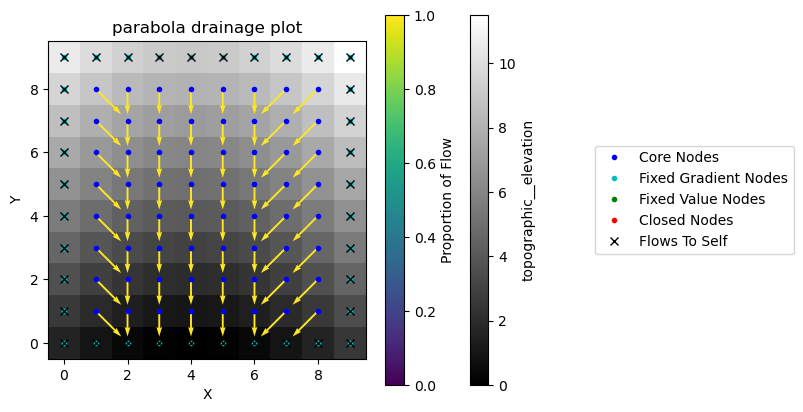

In [14]:
plt.figure()
drainage_plot(mg1,title='parabola drainage plot')

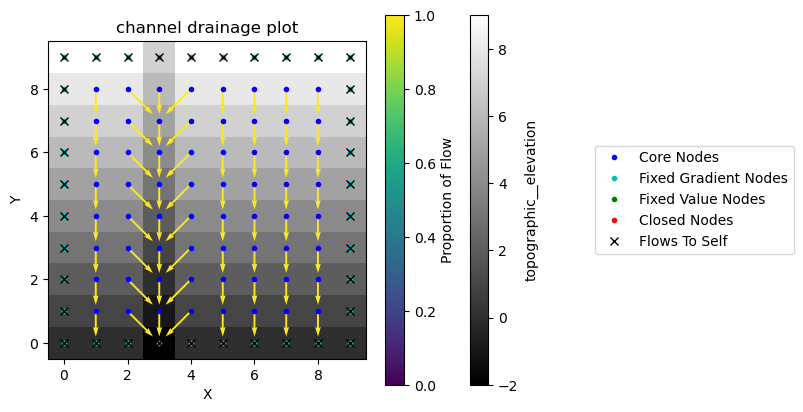

In [15]:
plt.figure()
drainage_plot(mg2,title = 'channel drainage plot')

In [16]:
fa1 = FlowAccumulator(mg1,flow_director='FlowDirectorD8')
fa2 = FlowAccumulator(mg2,flow_director='FlowDirectorD8')

In [17]:
fa1.run_one_step()
(da1,q1) = fa1.accumulate_flow()

fa2.run_one_step()
(da2,q2) = fa2.accumulate_flow()

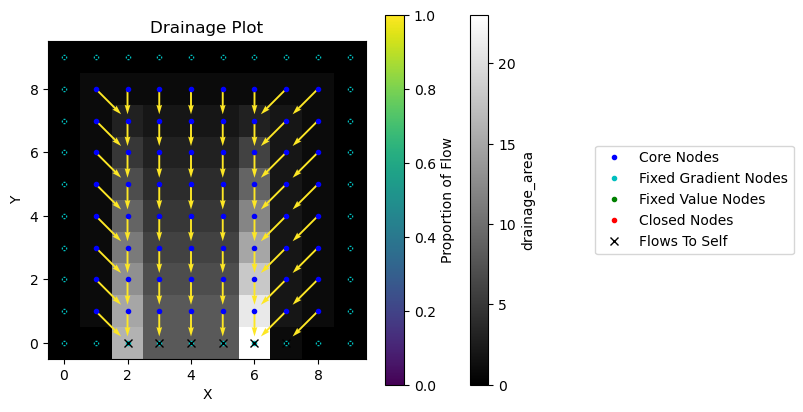

In [18]:
plt.figure()
drainage_plot(mg1,'drainage_area')

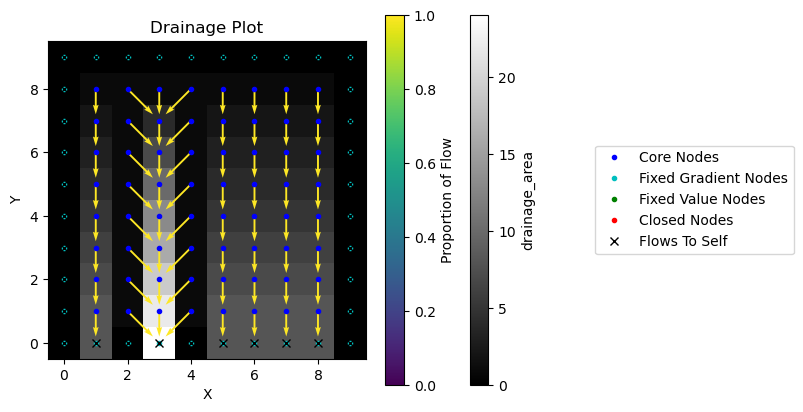

In [19]:
plt.figure()
drainage_plot(mg2,'drainage_area')

In [20]:
mg1.at_node.keys()

['topographic__elevation',
 'flow__link_to_receiver_node',
 'flow__receiver_node',
 'topographic__steepest_slope',
 'water__unit_flux_in',
 'drainage_area',
 'flow__data_structure_delta',
 'flow__upstream_node_order',
 'surface_water__discharge',
 'flow__sink_flag']